In [10]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [8]:
experiments = pd.read_csv('data/output_data/experiments_2000s_0p.csv')
outcomes = pd.read_csv('data/output_data/outcomes_2000s_0p.csv')

experiments = experiments.drop(columns='Unnamed: 0')
outcomes = outcomes.drop(columns='Unnamed: 0')
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,40,342.678794,10.0,0.596634,288.908370,1.0,0.635240,193.026130,1.5,0.803846,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,75,335.268316,1.5,0.920663,124.590927,1.0,0.302005,204.802225,1.0,0.243811,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,14,70.922900,1.0,0.538127,100.675513,10.0,0.978648,147.556589,1.0,0.344803,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,67,282.699435,1.5,0.703346,89.043213,1.5,0.951237,168.606134,1.0,0.444187,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,14,130.946873,10.0,0.535470,151.268829,1.0,0.162863,103.675961,1.0,0.107063,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,66,105.824179,10.0,0.827171,304.340241,10.0,0.883102,205.892157,10.0,0.383975,...,0,0,0,0,0,0,0,1995,policy 0,dikesnet
1996,6,197.838985,1.5,0.889614,139.491093,1.5,0.862869,349.273818,1.5,0.075577,...,0,0,0,0,0,0,0,1996,policy 0,dikesnet
1997,85,299.107407,10.0,0.987230,108.985073,10.0,0.598530,248.220747,10.0,0.958235,...,0,0,0,0,0,0,0,1997,policy 0,dikesnet
1998,94,221.440319,10.0,0.046065,211.603830,1.5,0.454907,347.831836,10.0,0.008815,...,0,0,0,0,0,0,0,1998,policy 0,dikesnet


In [9]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,1.882584e+08,0,0.0,0.0,0.179969,policy 0
1,1.039182e+09,0,0.0,0.0,1.671262,policy 0
2,9.152977e+08,0,0.0,0.0,1.323831,policy 0
3,4.608229e+08,0,0.0,0.0,0.584433,policy 0
4,2.776823e+09,0,0.0,0.0,3.839870,policy 0
...,...,...,...,...,...,...
1995,3.674243e+08,0,0.0,0.0,0.535035,policy 0
1996,1.917904e+09,0,0.0,0.0,3.401053,policy 0
1997,4.240269e+07,0,0.0,0.0,0.048261,policy 0
1998,4.900640e+09,0,0.0,0.0,4.779904,policy 0


# Multiscatter plot

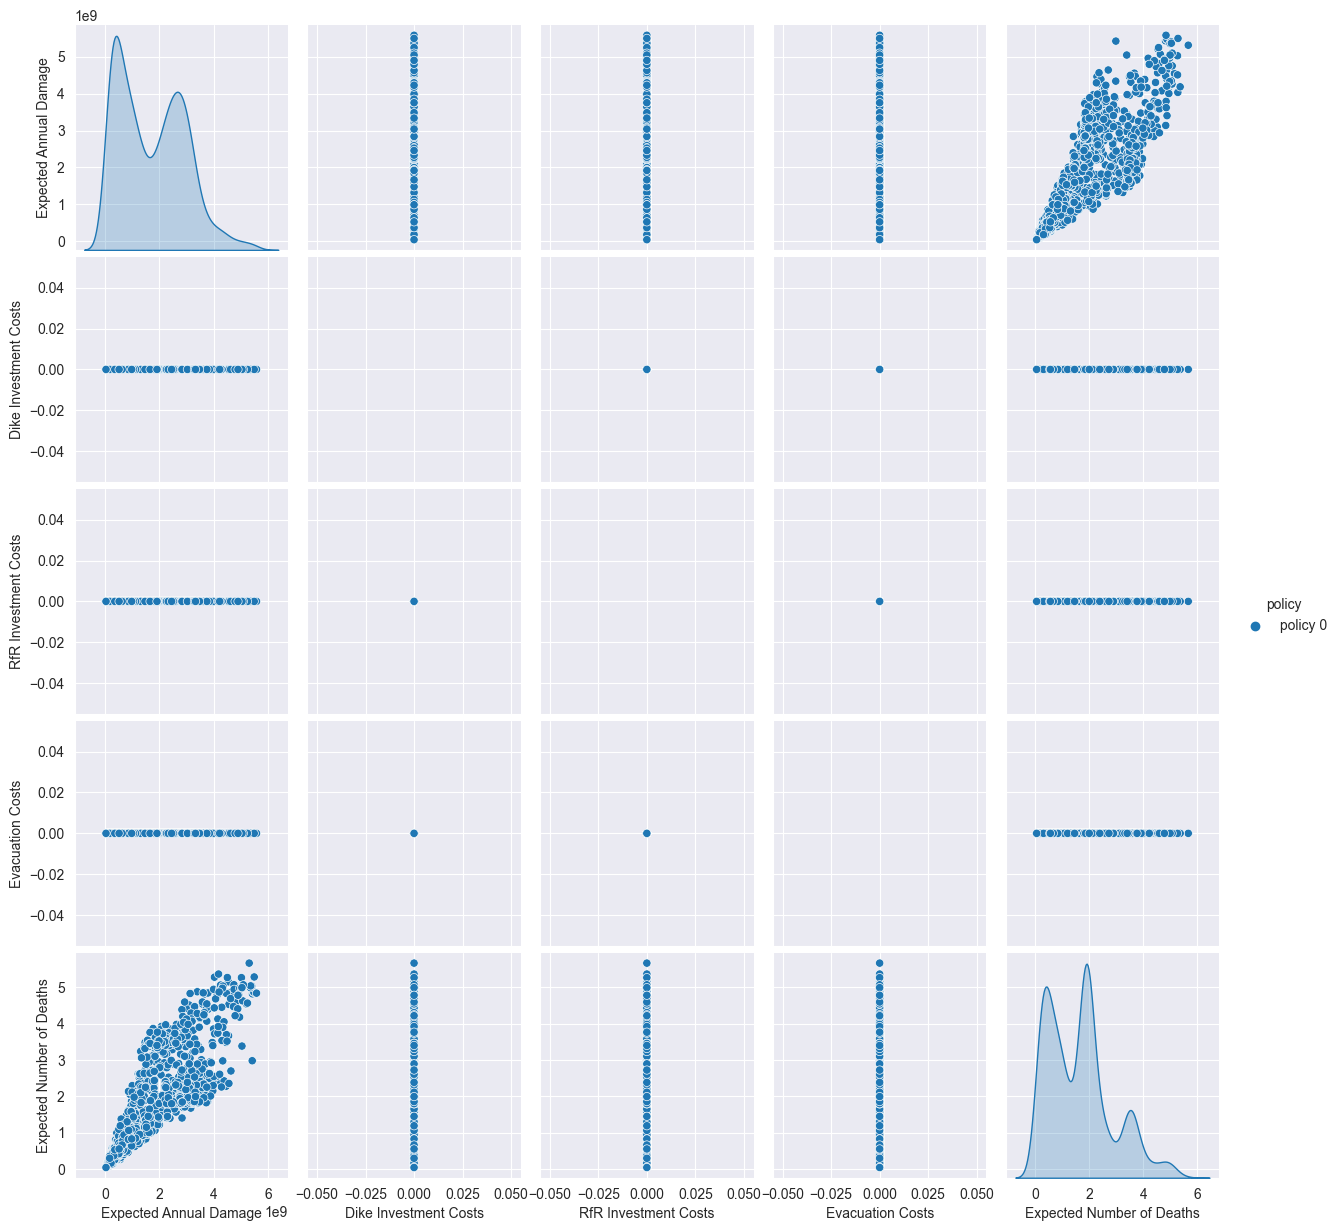

In [13]:
sns.pairplot(outcomes, hue='policy')
plt.show()

# Feature scoring

In [14]:
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainty_experiments = experiments.loc[:,list_of_uncertainties]

PRIM